In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [3]:
df = pd.read_csv('data/stud.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
X = df.drop(columns=['math score'],axis=1)
y = df['math score']

In [6]:
X

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [7]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [8]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [9]:
X = preprocessor.fit_transform(X)

In [10]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [11]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 19), (200, 19), (800,), (200,))

In [14]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true,predicted)
    return mae,rmse,r2_square

In [15]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoostRegressor": CatBoostRegressor(),
    "AdaBoostRegressor": AdaBoostRegressor(),
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train,y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model performance for training set")
    print("- Root mean squared error: {:.4f}".format(model_train_rmse))
    print("- Mean absolute error: {:.4f}".format(model_train_mae))
    print("- R2 score: {:.4f}".format(model_train_r2))
    
    print("-" * 30)
    
    print("Model performance for test set")
    print("- Root mean squared error: {:.4f}".format(model_test_rmse))
    print("- Mean absolute error: {:.4f}".format(model_test_mae))
    print("- R2 score: {:.4f}".format(model_test_r2))
    
    r2_list.append(model_test_r2)
    
    print("=" * 35)
    print("\n")

Linear Regression
Model performance for training set
- Root mean squared error: 5.3255
- Mean absolute error: 4.2685
- R2 score: 0.8742
------------------------------
Model performance for test set
- Root mean squared error: 5.4009
- Mean absolute error: 4.2184
- R2 score: 0.8801


Lasso
Model performance for training set
- Root mean squared error: 6.5938
- Mean absolute error: 5.2063
- R2 score: 0.8071
------------------------------
Model performance for test set
- Root mean squared error: 6.5197
- Mean absolute error: 5.1579
- R2 score: 0.8253


Ridge
Model performance for training set
- Root mean squared error: 5.3233
- Mean absolute error: 4.2650
- R2 score: 0.8743
------------------------------
Model performance for test set
- Root mean squared error: 5.3904
- Mean absolute error: 4.2111
- R2 score: 0.8806


K-Neighbors Regressor
Model performance for training set
- Root mean squared error: 5.7093
- Mean absolute error: 4.5175
- R2 score: 0.8554
------------------------------
Mode

In [16]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2 Score']).sort_values(by=['R2 Score'],ascending=False)

,Model Name,R2 Score
2,Ridge,0.880593
0,Linear Regression,0.880127
8,AdaBoostRegressor,0.859574
5,Random Forest Regressor,0.852513
7,CatBoostRegressor,0.851632
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783497
4,Decision Tree,0.751149


In [17]:
lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(X_train,y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test,y_pred) * 100
print(f"Accuracy of the model: {score}")

Accuracy of the model: 88.01272640936912


Text(0, 0.5, 'Predicted')

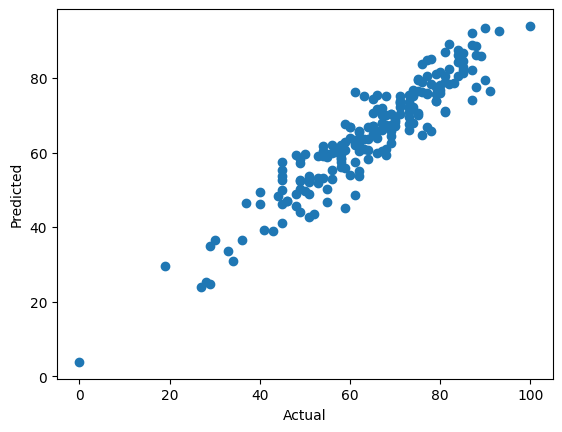

In [18]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

<Axes: xlabel='math score'>

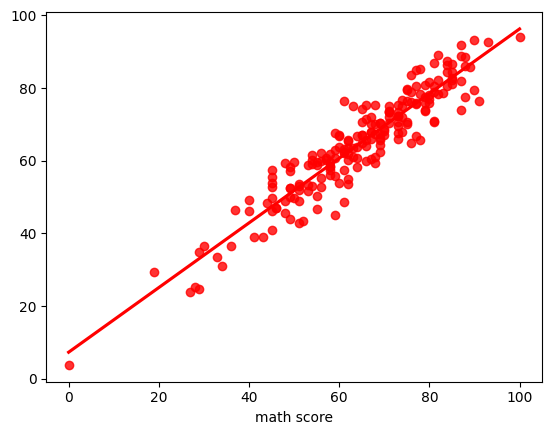

In [19]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

In [20]:
pred_df = pd.DataFrame({'Actual Value':y_test,'Predicted Value': y_pred,'Difference': y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.513672,14.486328
737,53,58.976562,-5.976562
740,80,76.884766,3.115234
660,74,76.710938,-2.710938
411,84,87.521484,-3.521484
...,...,...,...
408,52,43.564453,8.435547
332,62,61.994141,0.005859
208,74,68.009766,5.990234
613,65,67.134766,-2.134766
